In [12]:

# loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:

df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [15]:
#You can check the datatypes, missing values and number of records using the "info" method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [16]:
#Also, you can use the method "describe" to check some statistics.
#For example, the average value, the maximum and minimum, etc.

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


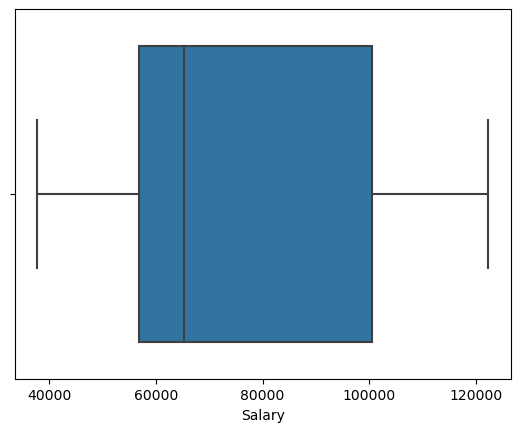

In [17]:
sns.boxplot(df['Salary'])
plt.show()

<AxesSubplot:xlabel='YearsExperience'>

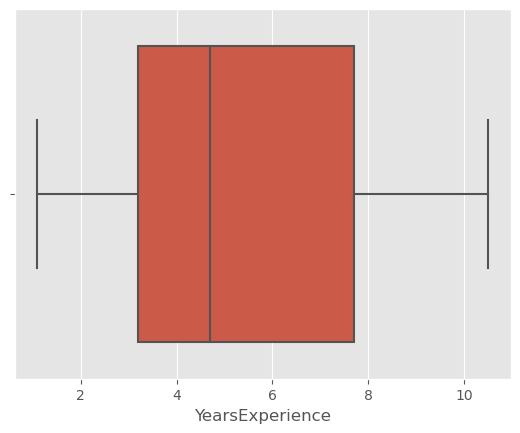

In [71]:
sns.boxplot(x = df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

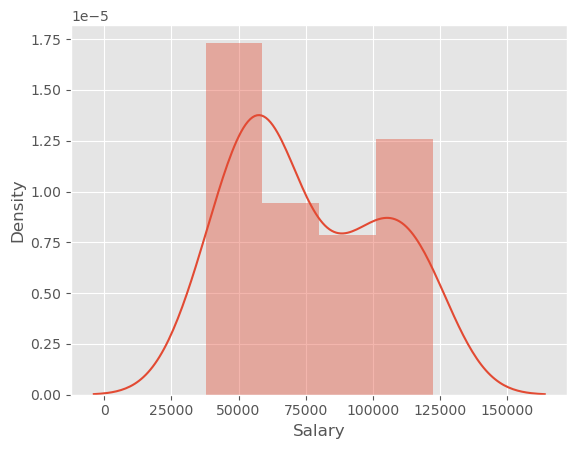

In [72]:
sns.distplot(df['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

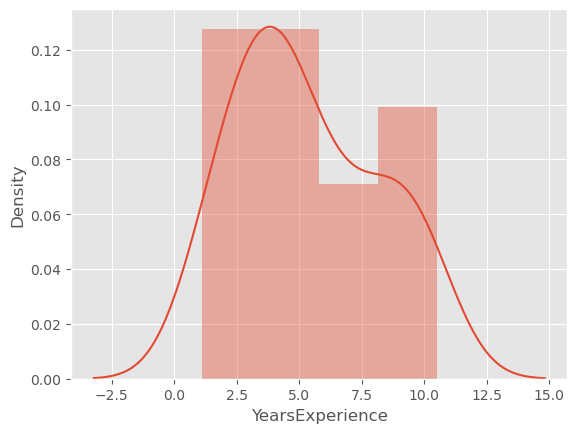

In [73]:
sns.distplot(df['YearsExperience'])

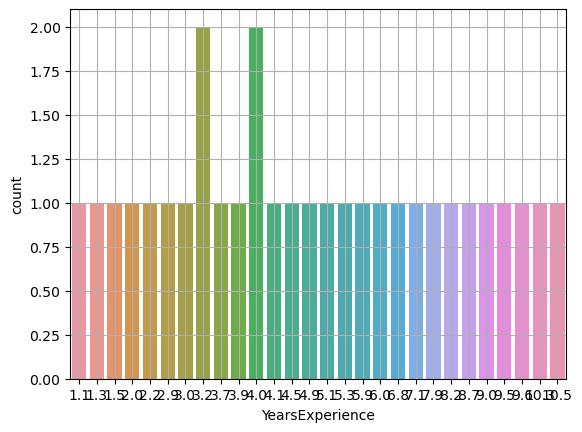

In [54]:
sns.countplot(data=df,x="YearsExperience")
plt.grid(True)
plt.show  ()

In [55]:
df["YearsExperience"].value_counts()

3.2     2
4.0     2
1.1     1
5.3     1
10.3    1
9.6     1
9.5     1
9.0     1
8.7     1
8.2     1
7.9     1
7.1     1
6.8     1
6.0     1
5.9     1
5.1     1
1.3     1
4.9     1
4.5     1
4.1     1
3.9     1
3.7     1
3.0     1
2.9     1
2.2     1
2.0     1
1.5     1
10.5    1
Name: YearsExperience, dtype: int64

<Figure size 7000x5000 with 0 Axes>

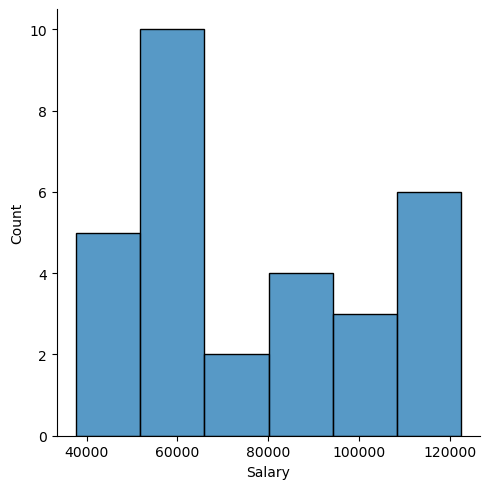

In [56]:
plt.figure(figsize=(70,50))
sns.displot(data=df,x="Salary")                        
plt.show()

In [18]:
import plotly.express as px

fig = px.line(df, x = 'YearsExperience', y = 'Salary', markers = True, width = 500, height = 500)
fig.show()

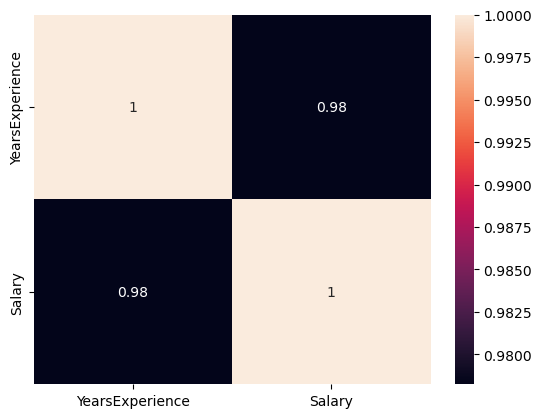

In [57]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

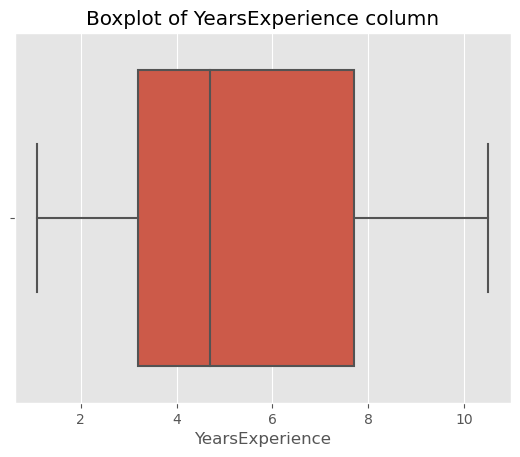

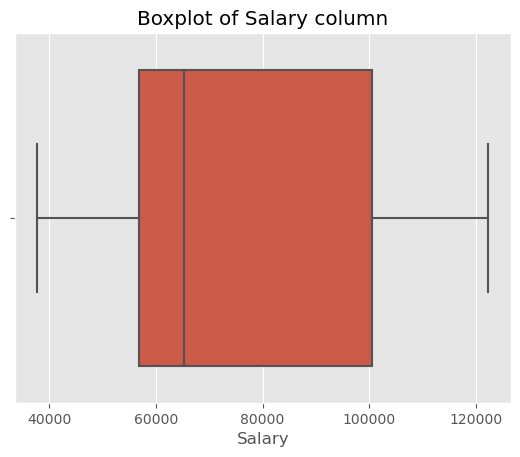

In [58]:
plt.style.use("ggplot")
for col in df.columns:
    sns.boxplot(x=col,data=df)
    plt.title("Boxplot of {} column".format(col))
    plt.show()

# Split data in train and test

You need to train your model using only some data (training set), and then check if it behaves properly with the other part that you left aside (testing set). This is to check whether your model will behave correctly in the real world, with data that hasn't been seen before.

First, we divide the dataset into label (y) and features (X).

In [35]:
#Extract dependent and independent variable

x = df.iloc[:,:-1].values  
y = df.iloc[:,1].values  

We have taken -1 for x as we want to remove last column from dataset
Similarly 1 for y as we want to extract the second column¶

In [36]:
x


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [37]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

Now we need to get the training set and the testing set.
We need the majority of the data in the training set, because it is the one the model will use to learn. 
For example, we can use 80% of the data for training and 20% for testing.

In [38]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)  

In [39]:
#Fitting the Simple Linear Regression model to the training dataset
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  #Train the model
#We will use Linear Regression, which is the simplest model.
#First let's instantiate (load) the model. We could also specify some parameters if we wished.


regressor.fit(x_train, y_train)
#Fit the training data. This is actually the model training!

LinearRegression()

In [40]:
#Prediction for Testing and Training set
y_pred = regressor.predict(x_test)  
x_pred = regressor.predict(x_train) 
#Assess the performance of the model on the testing set.

In [66]:
regressor.coef_

array([9345.94244312])

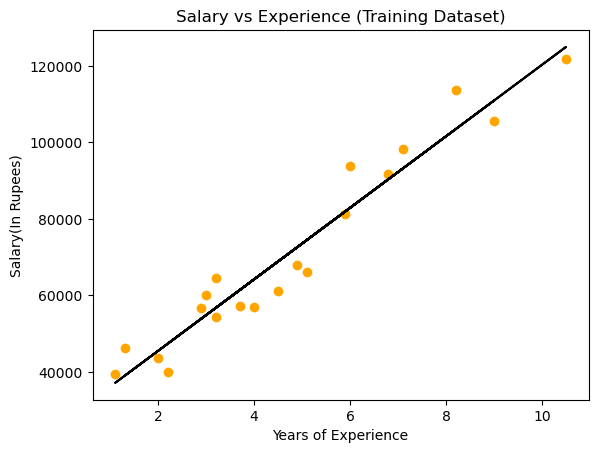

In [41]:
#Visualizing training set result
plt.scatter(x_train, y_train, color = "orange")   
plt.plot(x_train, x_pred, color = "black")    
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()   

Orange dots represent actual values and black regression line represents predicted values
Regression line shows correlation between dependent and independent variable
Most of the obseravtions are close to the regression line hence model is good for training set¶

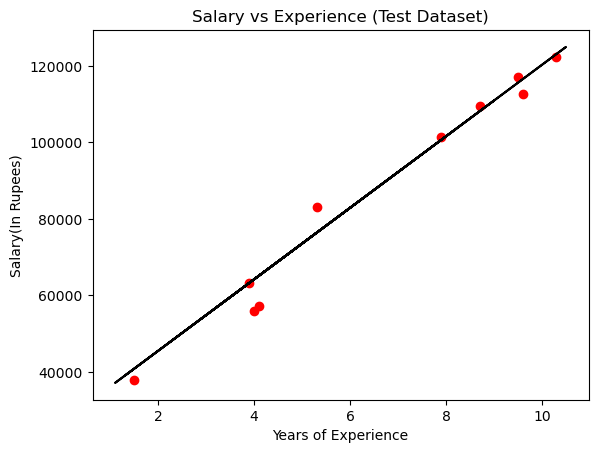

In [42]:
#Visualizing testing set results
plt.scatter(x_test, y_test, color = "red")   
plt.plot(x_train, x_pred, color = "black")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  

Observations are given by red dots and prediction is given by black regression line
Most of the observations are close to the regression line, hence we can say this is a good model

In [43]:
from sklearn.metrics import r2_score,mean_squared_error

In [44]:
mse = mean_squared_error(y_pred,y_test)

In [45]:
r_sq = r2_score(y_pred,y_test)

In [46]:
print('Mean Squared Error :',mse)
print('R square :',r_sq)

Mean Squared Error : 21026037.329511296
R square : 0.9716987073632184


It achieved a R-squared of 97%.

R-squared or coefficient of determination of the prediction is a statistical measure to assess the performance of regression models

In [47]:
print('Intercept of the model:',regressor.intercept_)
print('Coefficient of the line:',regressor.coef_)

Intercept of the model: 26816.19224403119
Coefficient of the line: [9345.94244312]


In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
mean_abs_error=mean_absolute_error(y_test, y_pred)
round(mean_abs_error,1)

3426.4

In [50]:
new_predict=[[15]]
predict=regressor.predict(new_predict)
print(predict)

[167005.32889087]


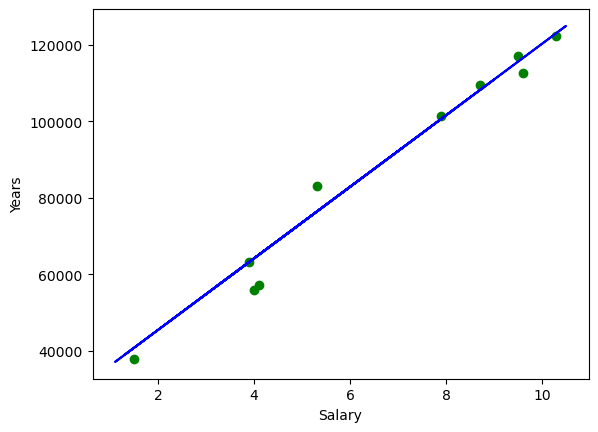

In [51]:


plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train,regressor.predict(x_train), color = 'blue')
plt.xlabel('Salary')
plt.ylabel('Years')
plt.show()

# it is not use of this model in this dateset! we have just try ...for are knowledge  for training acc  testing acc  !S

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [68]:
tr=knn.score(xtrain,ytrain)
te=knn.score(xtest,ytest)

print(f"Training acc  :{tr}\nTesting acc :{te}")

Training acc  :0.13636363636363635
Testing acc :0.0


In [65]:

    knn=KNeighborsClassifier(n_neighbors=6)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    
    tr=knn.score(xtrain,ytrain)
    te=knn.score(xtest,ytest)
    
    print(f"Training acc  :{tr}\nTesting acc :{te}") 

Training acc  :0.13636363636363635
Testing acc :0.0
